<a href="https://colab.research.google.com/github/ersimbu89/AIMLProjects/blob/master/0711__Covid_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.**

In [595]:
# Importing Libraries

import pandas as pd
import numpy as np

import tensorflow as tf 
from keras.utils.np_utils import to_categorical
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense ,Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage.filters import gaussian_filter

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


import cv2
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Suppress scientific notation in numpy outputs
np.set_printoptions(suppress=True)

In [596]:
# Loading the dataset

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
Train_Images=np.load('/content/drive/MyDrive/Colab Notebooks/Covid/trainimage.npy')
Train_Labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Covid/trainLabels.csv")
Test_Images=np.load('/content/drive/MyDrive/Colab Notebooks/Covid/testimage.npy')
Test_Labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Covid/testLabels.csv")

Mounted at /content/drive


In [597]:
# Data shape - Training sets


# Training Images shape
print ("Training images shapes :"+ str(Train_Images.shape))

# Training Labels shape
print ("Training images Labels :"+ str(Train_Labels.shape))

Training images shapes :(251, 128, 128, 3)
Training images Labels :(251, 1)


**Inferences:**
 

1.   Number of images in Train image file =251
2.   The size of each image in train image is 128x128 pixels
3.   Each image has 3 color channels(Red, Green , Blue(RGB))
4.   Number of rows in Train Labels file is 251
5.   Number of columns in Train Labels file is 1


In [598]:
# Data shape - Test sets


# Test Images shape
print ("Training images shapes :"+ str(Test_Images.shape))

# Test Labels shape
print ("Training images Labels :"+ str(Test_Labels.shape))

Training images shapes :(66, 128, 128, 3)
Training images Labels :(66, 1)


**Inferences:**

1. Number of images in Train image file =66
2. The size of each image in train image is 128x128 pixels
3. Each image has 3 color channels(Red, Green , Blue(RGB))
4. Number of rows in Train Labels file is 66
5. Number of columns in Train Labels file is 1

 Sample Normal Images from Train set 



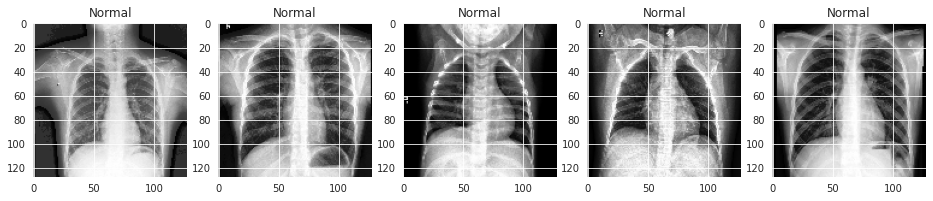

 Sample Covid Images from Train set 



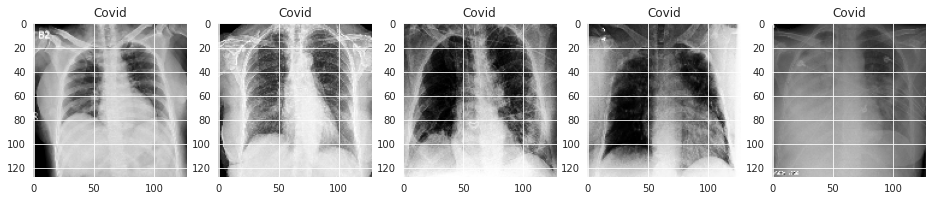

 Sample Viral Pneumonia Images from Train set 



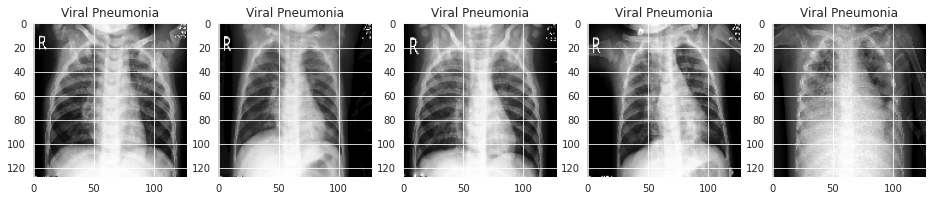

In [599]:
# Visualising the  sample Train images for all 3 classes

plt.figure(figsize=(16,8), facecolor='white')
plotnumber=1
print(" Sample Normal Images from Train set \n")
for i in range(220,225):
  train_label=Train_Labels.values
  train_image = Train_Images[i] 
  lab=train_label[i][0]
  ax = plt.subplot(1,5,plotnumber)
  plt.title(lab)
  plt.imshow(Train_Images[i])
  plotnumber+=1
plt.show()


print(" Sample Covid Images from Train set \n")
plt.figure(figsize=(16,8), facecolor='white')
plotnumber=1
for i in range(100,105):
  train_label=Train_Labels.values
  train_image = Train_Images[i] 
  lab=train_label[i][0]
  ax = plt.subplot(1,5,plotnumber)
  plt.title(lab)
  plt.imshow(Train_Images[i])
  plotnumber+=1
plt.show()

print(" Sample Viral Pneumonia Images from Train set \n")
plt.figure(figsize=(16,8), facecolor='white')
plotnumber=1
for i in range(0,5):
  train_label=Train_Labels.values
  train_image = Train_Images[i] 
  lab=train_label[i][0]
  ax = plt.subplot(1,5,plotnumber)
  plt.title(lab)
  plt.imshow(Train_Images[i])
  plotnumber+=1
plt.show()

 Sample Viral Pneumonia Images from Test set 



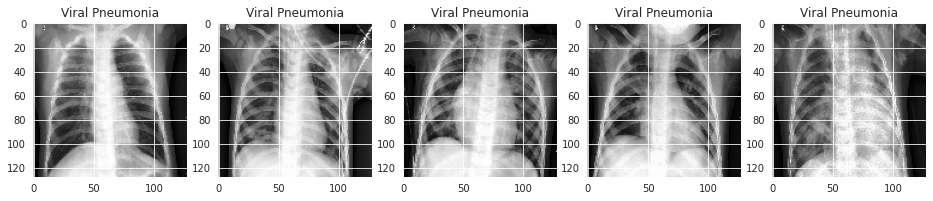

 Sample Covid Images from Test set 



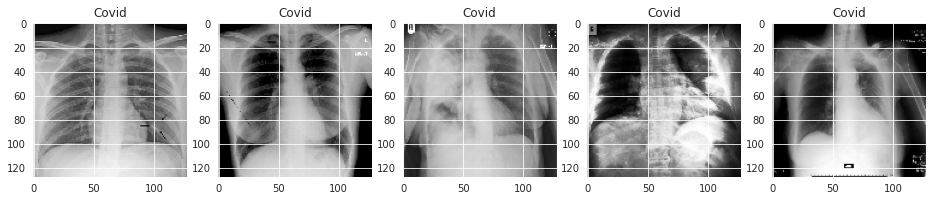

 Sample Normal Images from Test set 



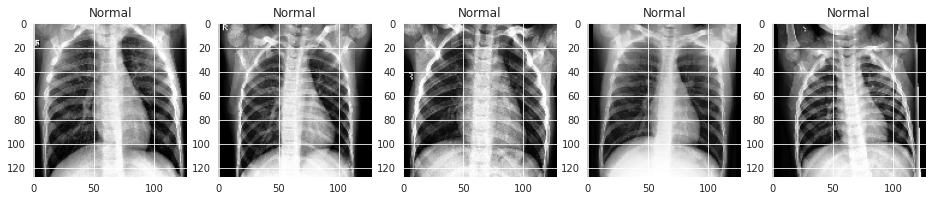

In [600]:
# Visualising the  sample Test images for all 3 classes

plt.figure(figsize=(16,8), facecolor='white')
plotnumber=1
print(" Sample Viral Pneumonia Images from Test set \n")
for i in range(0,5):
  test_label=Test_Labels.values
  test_image = Test_Images[i] 
  lab=test_label[i][0]
  ax = plt.subplot(1,5,plotnumber)
  plt.title(lab)
  plt.imshow(Test_Images[i])
  plotnumber+=1
plt.show()


print(" Sample Covid Images from Test set \n")
plt.figure(figsize=(16,8), facecolor='white')
plotnumber=1
for i in range(20,25):
  test_label=Test_Labels.values
  test_image = Test_Images[i] 
  lab=test_label[i][0]
  ax = plt.subplot(1,5,plotnumber)
  plt.title(lab)
  plt.imshow(Test_Images[i])
  plotnumber+=1
plt.show()

print(" Sample Normal Images from Test set \n")
plt.figure(figsize=(16,8), facecolor='white')
plotnumber=1
for i in range(60,65):
  test_label=Test_Labels.values
  test_image = Test_Images[i] 
  lab=test_label[i][0]
  ax = plt.subplot(1,5,plotnumber)
  plt.title(lab)
  plt.imshow(Test_Images[i])
  plotnumber+=1
plt.show()



**2. Explore the data**

In [601]:
# Number of unique Xray types

print("Number of unique X-ray types in Train set")
Train_Labels.apply(lambda x: (x.nunique()))


Number of unique X-ray types in Train set


Label    3
dtype: int64

In [602]:
# Unique class labels- Train set
Train_Labels.apply(lambda x: (x.unique()))

,Label
0,Viral Pneumonia
1,Covid
2,Normal


In [603]:
print("Number of unique X-ray types in Test set")
Test_Labels.apply(lambda x: (x.nunique()))


Number of unique X-ray types in Test set


Label    3
dtype: int64

In [604]:
# Unique class labels- Test set
Test_Labels.apply(lambda x: (x.unique()))

,Label
0,Viral Pneumonia
1,Covid
2,Normal


In [605]:
# Finding the distribution among x-ray types

print("Distribution among X-ray types in Train set \n"+ str(Train_Labels['Label'].value_counts()))
print("Distribution among X-ray types in Test set \n"+ str(Test_Labels['Label'].value_counts()))

Distribution among X-ray types in Train set 
Covid              111
Viral Pneumonia     70
Normal              70
Name: Label, dtype: int64
Distribution among X-ray types in Test set 
Covid              26
Viral Pneumonia    20
Normal             20
Name: Label, dtype: int64


 Unique Label and %
Covid              44.223108
Viral Pneumonia    27.888446
Normal             27.888446
Name: Label, dtype: float64


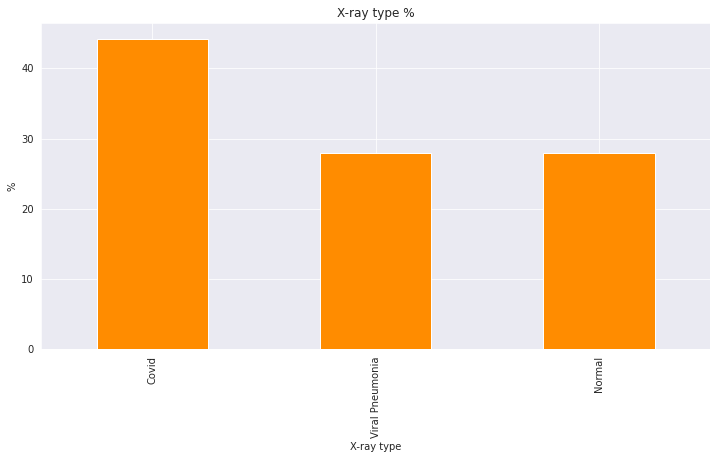

In [606]:
# Determining % of distribution and plotting the graph - Train set

print(" Unique Label and %")
print(Train_Labels['Label'].value_counts()/len(Train_Labels)*100)
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.title('X-ray type %')
plt.xlabel('X-ray type')
plt.ylabel('%')
(Train_Labels['Label'].value_counts()/ len(Train_Labels)*100).plot.bar(color='darkorange');

 Unique Label and %
Covid              39.393939
Viral Pneumonia    30.303030
Normal             30.303030
Name: Label, dtype: float64


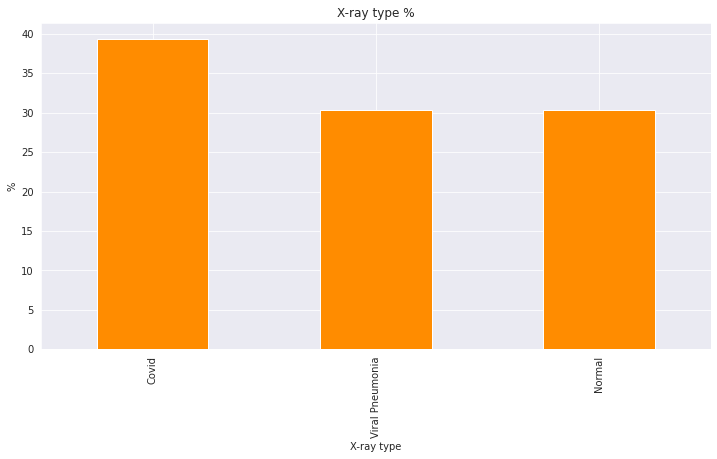

In [607]:
# Determining % of distribution and plotting the graph - Test set

print(" Unique Label and %")
print(Test_Labels['Label'].value_counts()/len(Test_Labels)*100)
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.title('X-ray type %')
plt.xlabel('X-ray type')
plt.ylabel('%')
(Test_Labels['Label'].value_counts()/ len(Test_Labels)*100).plot.bar(color='darkorange');

**3.Data Pre-processing**

In [608]:
# Gaussian Blurring - Train Images

X_blur=[]
length=len(Train_Images)
for i in range(length):
  Gaussian = cv2.GaussianBlur(Train_Images[i], (5, 5),4)
  X_blur.append(Gaussian)
X_blur=np.array(X_blur)
print(X_blur.shape)

(251, 128, 128, 3)


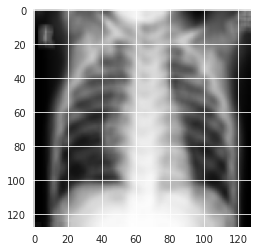

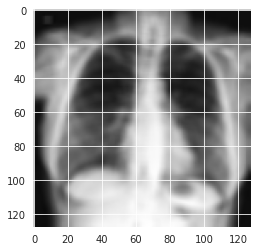

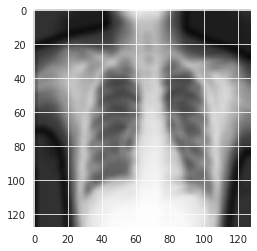

In [609]:
# Visualise the sample Train Images after gaussian blurring
print()
plt.imshow(X_blur[0])
plt.show()
plt.imshow(X_blur[125])
plt.show()
plt.imshow(X_blur[220])

In [610]:
# Gaussian Blurring - Test Images

X_Testblur=[]
length=len(Test_Images)
for i in range(length):
  Gaussian = cv2.GaussianBlur(Test_Images[i], (5, 5),4)
  X_Testblur.append(Gaussian)
X_Testblur=np.array(X_Testblur)
print(X_Testblur.shape)

(66, 128, 128, 3)


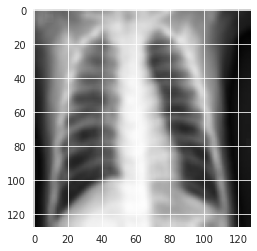

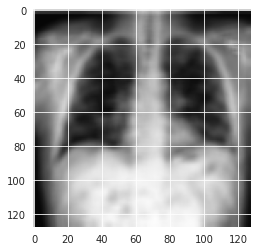

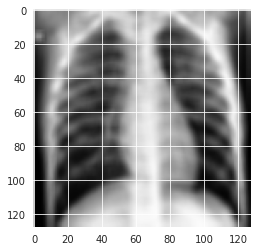

In [611]:
# Visualise the sample Test Images after gaussian blurring
print()
plt.imshow(X_Testblur[0])
plt.show()
plt.imshow(X_Testblur[25])
plt.show()
plt.imshow(X_Testblur[60])

In [612]:
# Creating XTrain - copy of blured Train images
# Convert data type of XTrain to float
# Normalize the  Train data and get the shape

XTrain = X_blur.copy()
XTrain = XTrain.astype('float32') 
XTrain /= 255.0 
XTrain.shape


(251, 128, 128, 3)

In [613]:
# Creating XTest - copy of blured Test images
# Convert data type of XTest to float
# Normalize the Test data and get the shape

XTest = X_Testblur.copy()
XTest = XTest.astype('float32') 
XTest /= 255.0 
XTest.shape


(66, 128, 128, 3)

**4.Make data compatible:**

In [614]:
# Converting categorical variable into numerical variable - Train set
# Define Target class variable
# Displaying sample labels

Train_Labels['Label']=Train_Labels['Label'].replace(["Covid","Viral Pneumonia","Normal"],["1","2","0"])
yTrain=Train_Labels
yTrain.loc[[0,120,240]]

,Label
0,2
120,1
240,0


In [615]:
# Converting categorical variable into numerical variable - Test set
# Define Target class variable
# Displaying sample labels

Test_Labels['Label']=Test_Labels['Label'].replace(["Covid","Viral Pneumonia","Normal"],["1","2","0"])
yTest=Test_Labels
yTest.loc[[0,25,60]]

,Label
0,2
25,1
60,0


In [616]:
# Binary class conversion - Train set

yTrain= keras.utils.to_categorical(yTrain, 3)
yTrain.shape

(251, 3)

In [617]:
# Displaying sample Train set  Target value for all 3 classes after binary conversion 
print("Sample Viral Pneumonia Label after binary conversion")
print(yTrain[1])
print("Sample covid Label after binary conversion")
print(yTrain[101])
print("Sample Normal Label after binary conversion")
print(yTrain[221])

Sample Viral Pneumonia Label after binary conversion
[0. 0. 1.]
Sample covid Label after binary conversion
[0. 1. 0.]
Sample Normal Label after binary conversion
[1. 0. 0.]


In [618]:
# Binary class conversion - Test set

yTest = keras.utils.to_categorical(yTest, 3)
yTest.shape



(66, 3)

In [619]:
# Displaying sample Test set  Target value for all 3 classes after binary conversion 
print("Sample Viral Pneumonia Label after binary conversion")
print(yTrain[0])
print("Sample covid Label after binary conversion")
print(yTest[25])
print("Sample Normal Label after binary conversion")
print(yTest[60])


Sample Viral Pneumonia Label after binary conversion
[0. 0. 1.]
Sample covid Label after binary conversion
[0. 1. 0.]
Sample Normal Label after binary conversion
[1. 0. 0.]


In [620]:
XTrain.shape

(251, 128, 128, 3)

In [621]:
yTrain.shape

(251, 3)

In [622]:
XTest.shape

(66, 128, 128, 3)

In [623]:
yTest.shape

(66, 3)

In [624]:
#Reshape is not needed

**4. Building CNN**

a. Define layers.


*   Convolutional input layer, 32 feature maps with a size of 3x3 and a rectifier activation function
______________________________________________________
*  Convolutional input layer, 64 feature maps with a size of 3x3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 25%
________________________________________________________
*  Convolutional input layer, 64 feature maps with a size of 3x3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 25%
________________________________________________________
*  Convolutional input layer, 128 feature maps with a size of 3x3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 25%
________________________________________________________
*  Convolutional input layer, 128 feature maps with a size of 3x3 and a rectifier activation function
*   Max Pool layer with size 2
*   Dropout layer at 25%
________________________________________________________
*   Flatten layer followed by Fully connected layer with 64 units and a rectifier activation function
*   Dropout layer at 0.5
*    Fully connected output layer with 3 classes and a softmax activation function
________________________________________________________



In [625]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense ,Input
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(10)

model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=XTrain.shape[1:]))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(3,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [626]:
# Add constraints and record best weights 

callbacks = [
    EarlyStopping(
        monitor='val_loss',             # Monitor validation loss history
        min_delta=0.001,                # Stop training when validation loss is no longer improving by at least 0.001
        patience=10,                    # Look at validation loss improvement over the last 10 epochs
        verbose=1), 
    
    ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks//bstypes.h5',
       monitor='val_loss',
       verbose=1,
       save_best_only=True,
       save_weights_only=True,
       mode='auto')
]

**5.Fit and evaluate modeland print confusion matrix**

In [627]:
# fit the model

Results= model.fit(XTrain, yTrain,callbacks=callbacks, epochs = 30, batch_size=7,validation_data = (XTest, yTest),verbose = 1)


Epoch 1/30
36/36 [==============================] - 1s 19ms/step - loss: 1.0930 - accuracy: 0.4303 - val_loss: 1.0793 - val_accuracy: 0.3939

Epoch 00001: val_loss improved from inf to 1.07926, saving model to /content/drive/MyDrive/Colab Notebooks/bstypes.h5
Epoch 2/30
36/36 [==============================] - 0s 12ms/step - loss: 1.0278 - accuracy: 0.5139 - val_loss: 0.9817 - val_accuracy: 0.6667

Epoch 00002: val_loss improved from 1.07926 to 0.98166, saving model to /content/drive/MyDrive/Colab Notebooks/bstypes.h5
Epoch 3/30
36/36 [==============================] - 0s 12ms/step - loss: 0.9019 - accuracy: 0.5936 - val_loss: 0.7237 - val_accuracy: 0.7727

Epoch 00003: val_loss improved from 0.98166 to 0.72369, saving model to /content/drive/MyDrive/Colab Notebooks/bstypes.h5
Epoch 4/30
36/36 [==============================] - 0s 12ms/step - loss: 0.5752 - accuracy: 0.7092 - val_loss: 0.6008 - val_accuracy: 0.7273

Epoch 00004: val_loss improved from 0.72369 to 0.60082, saving model t

**Evaluating Model using Train set**

In [628]:
# Evaluating Accuracy and loss for Training set

model.load_weights('/content/drive/MyDrive/Colab Notebooks//bstypes.h5')
Training_Accuracy=model.evaluate(x=XTrain,y=yTrain)
print("Model loss for Training set: {} , Accuracy Model for Training set :{} ".format(Training_Accuracy[0],Training_Accuracy[1]))

8/8 [==============================] - 0s 17ms/step - loss: 0.1688 - accuracy: 0.9323
Model loss for Training set: 0.1687767207622528 , Accuracy Model for Training set :0.9322709441184998 


**Evaluating Model using TEst set**

In [629]:
# Test set - Accuracy and Loss

model.load_weights('/content/drive/MyDrive/Colab Notebooks//bstypes.h5')
Validation_Accuracy=model.evaluate(x=XTest,y=yTest)
print("Model loss for validation set: {} , Accuracy Model for validation set :{} ".format(Validation_Accuracy[0],Validation_Accuracy[1]))

3/3 [==============================] - 0s 10ms/step - loss: 0.3008 - accuracy: 0.8939
Model loss for validation set: 0.300846129655838 , Accuracy Model for validation set :0.8939393758773804 


In [630]:
def one_hot_to_dense(labels_one_hot):
    num_labels = labels_one_hot.shape[0]
    num_classes = labels_one_hot.shape[1]
    labels_dense = np.where(labels_one_hot == 1)[1]      
    return labels_dense

In [631]:
# Test set - Predictions 

y_val_predict = model.predict_classes(XTest)
report=classification_report(one_hot_to_dense(yTest),y_val_predict)
print(report)



              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       1.00      0.92      0.96        26
           2       0.89      0.85      0.87        20

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.90      0.89      0.90        66



In [632]:
XrayTypes = ["Viral Pneumonia","Covid","Normal"]
num_XrayTypes = len(XrayTypes)
abbreviation = ['VP', 'C19', 'N']
pd.DataFrame({'class': XrayTypes, 'abbreviation': abbreviation})



,class,abbreviation
0,Viral Pneumonia,VP
1,Covid,C19
2,Normal,N


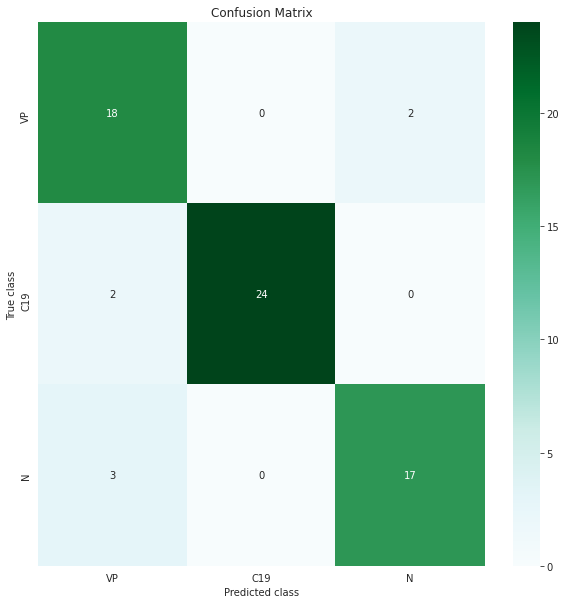

In [633]:
# Confusion matrix 

from sklearn.metrics import confusion_matrix, classification_report
conf_mat= confusion_matrix(one_hot_to_dense(yTest), y_val_predict)
fig, ax = plt.subplots(1,figsize=(10,10))

ax = sns.heatmap(conf_mat, ax=ax, cmap=plt.cm.BuGn, annot=True)
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
fig.savefig('Confusion matrix.png', dpi=300)
plt.show();



**6.Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]**

In [634]:
# Loading the y_test values in new Dataframe called Label

Label= pd.DataFrame(one_hot_to_dense(yTest))
Label

,0
0,2
1,2
2,2
3,2
4,2
...,...
61,0
62,0
63,0
64,0


In [635]:
# Storing the Test set -predicted values in new pandas Series called PredictedValues

PredictedValues=pd.Series(y_val_predict)
PredictedValues

0     2
1     0
2     2
3     2
4     2
     ..
61    0
62    0
63    0
64    0
65    0
Length: 66, dtype: int64

In [636]:
# Creating Dictionary for mapping ID  and its correspponding label

dict = {0:"Normal",1: "Covid", 2:"Viral Pneumonia"}

In [637]:
# Creating new dataframe called XrayClass - replica of existing dataframe-Label
XrayClass = Label.copy()
XrayClass

,0
0,2
1,2
2,2
3,2
4,2
...,...
61,0
62,0
63,0
64,0


In [638]:
# Adding new column called Name to dataframe

XrayClass['Name']=Label.replace({0 : dict})
XrayClass

,0,Name
0,2,Viral Pneumonia
1,2,Viral Pneumonia
2,2,Viral Pneumonia
3,2,Viral Pneumonia
4,2,Viral Pneumonia
...,...,...
61,0,Normal
62,0,Normal
63,0,Normal
64,0,Normal


In [639]:
# Rename the column Name

XrayClass = XrayClass.rename(columns = {0:'ActualValue-LabelID'})
XrayClass = XrayClass.rename(columns = {'Name':'Xray Class Name'})


In [640]:
XrayClass['PredictedValue-LabelID']=PredictedValues

In [641]:
# Displaying Dataframe -  Actual vs Predicted value of test set

XrayClass[0:]

,ActualValue-LabelID,Xray Class Name,PredictedValue-LabelID
0,2,Viral Pneumonia,2
1,2,Viral Pneumonia,0
2,2,Viral Pneumonia,2
3,2,Viral Pneumonia,2
4,2,Viral Pneumonia,2
...,...,...,...
61,0,Normal,0
62,0,Normal,0
63,0,Normal,0
64,0,Normal,0


X_test[2] Image =


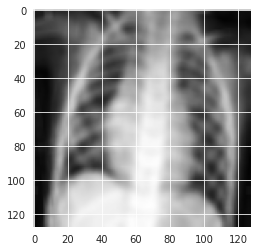



Actual Vs Predicted value for X_test[2] 



,ActualValue-LabelID,Xray Class Name,PredictedValue-LabelID
2,2,Viral Pneumonia,2


In [642]:
# Results for X_test[2]-Predicted Vs Actual

print("X_test[2] Image =")
plt.imshow(XTest[2])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[2] \n")

XrayClass.loc[[2]]


**Inference:** Predicted value matches with Actual value. Viral Pneumonia Xray image is available in X_test[2]

X_test[3] Image =


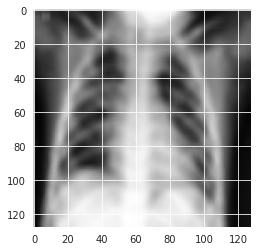



Actual Vs Predicted value for X_test[3] 



,ActualValue-LabelID,Xray Class Name,PredictedValue-LabelID
3,2,Viral Pneumonia,2


In [643]:
# Results for X_test[3]-Predicted Vs Actual

print("X_test[3] Image =")
plt.imshow(XTest[3])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[3] \n")
XrayClass.loc[[3]]


**Inference:** Predicted value matches with Actual value. Viral Pneumonia image is available in X_test[3]

X_test[33] Image =


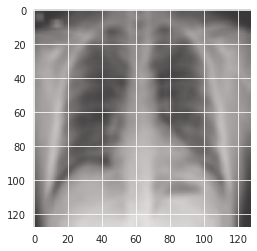



Actual Vs Predicted value for X_test[33] 



,ActualValue-LabelID,Xray Class Name,PredictedValue-LabelID
33,1,Covid,1


In [644]:
# Results for X_test[33]-Predicted Vs Actual

print("X_test[33] Image =")
plt.imshow(XTest[33])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[33] \n")
XrayClass.loc[[33]]

**Inference:** Predicted value matches with Actual value. Covid Xray image is available in X_test[33]

X_test[36] image =


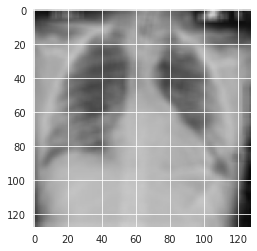



Actual Vs Predicted value for X_test[36]


,ActualValue-LabelID,Xray Class Name,PredictedValue-LabelID
36,1,Covid,1


In [645]:
# Results for X_test[36]-Predicted Vs Actual

print("X_test[36] image =")
plt.imshow(XTest[36])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[36]")
XrayClass.loc[[36]]

**Inference:** Predicted value matches with Actual value. Covid Xray image is available in X_test[36]

X_test[59] Image =


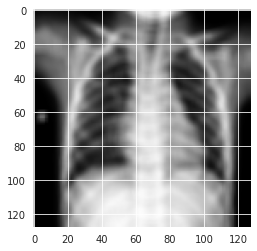



Actual Vs Predicted value for X_test[59]


,ActualValue-LabelID,Xray Class Name,PredictedValue-LabelID
59,0,Normal,0


In [646]:
# Results for X_test[59]-Predicted Vs Actual

print("X_test[59] Image =")
plt.imshow(XTest[59])
plt.show()
print("\n")
print("Actual Vs Predicted value for X_test[59]")
XrayClass.loc[[59]]

**Inference:** Predicted value matches with Actual value. Normal Xray image is available in X_test[59]